In [7]:
import scanpy as sc
from matplotlib import pyplot as plt
from matplotlib import rcParams,cm,colors

In [3]:
#read in data
adata = sc.read("../../output/adata_anno.h5ad")

In [4]:
adata_cc = adata.copy()
sc.pp.regress_out(adata_cc, 'cc_dif')
sc.tl.pca(adata_cc, svd_solver='arpack')

In [5]:
#draw umaps for different numbers of PCs
def draw_umap_npcs(adata,n_pcs):
    vega_10 = list(map(colors.to_hex, cm.tab10.colors))
    sc.pp.neighbors(adata, n_pcs = n_pcs)
    sc.tl.umap(adata)
    sc.tl.louvain(adata, key_added='louvain_r1')
    sc.tl.louvain(adata, resolution=0.5, key_added='louvain_r0.5')
    sc.tl.louvain(adata, resolution=0.8, key_added='louvain_r0.8')
    sc.tl.louvain(adata, resolution=1.2, key_added='louvain_r1.2')
    sc.tl.louvain(adata, resolution=1.5, key_added='louvain_r1.5')
    sc.pl.umap(adata, color=['time_point','phase'],palette = vega_10,save = 'tp_phase_pcs' + str(n_pcs))
    sc.pl.umap(adata, color=['Elavl4','Ret','S100b','Fabp7','Gfap'], color_map = "viridis", save = 'markers_cell_cycle_regressed' + str(n_pcs))
    sc.pl.umap(adata, color=['louvain_r1.5','louvain_r1.2','louvain_r1', 'louvain_r0.8','louvain_r0.5'], palette=sc.pl.palettes.default_64,save = 'louvain_cell_cycle_regressed' + str(n_pcs))
    return(adata)

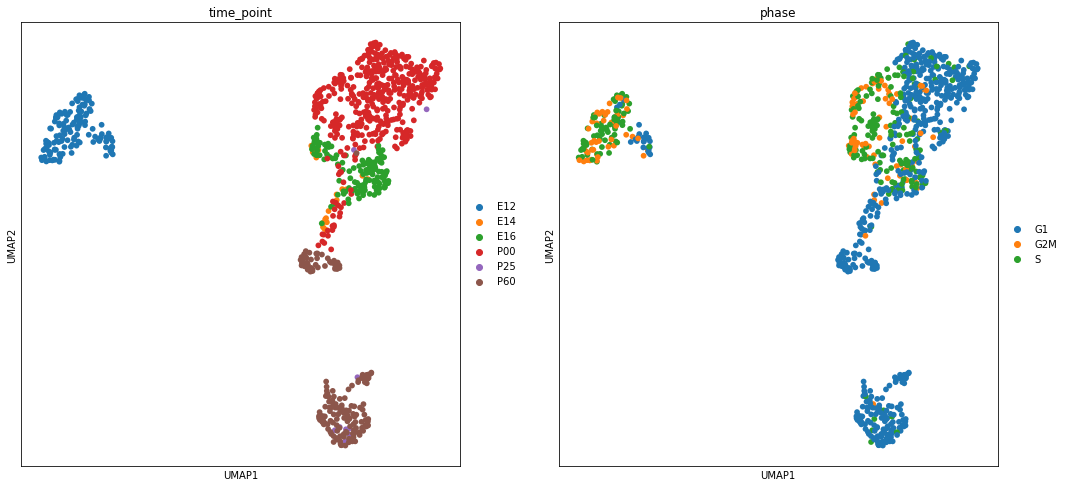

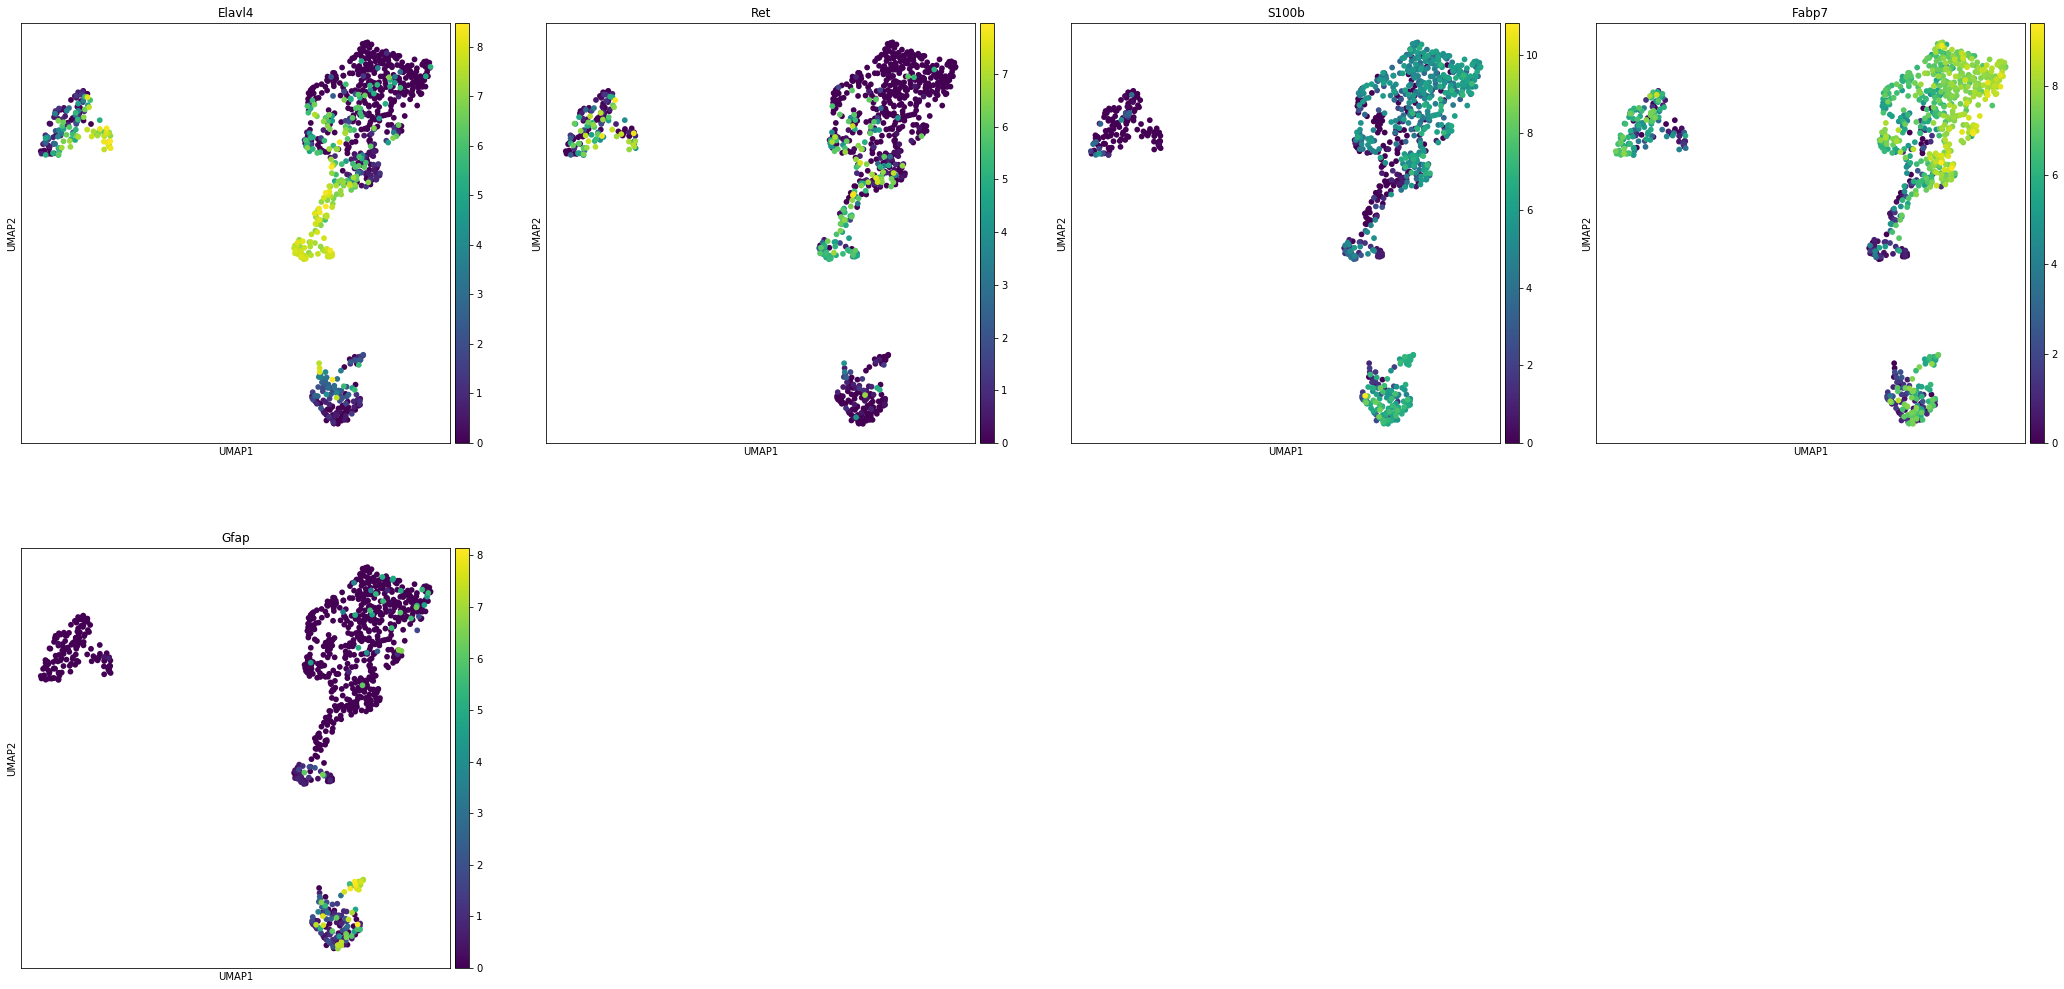

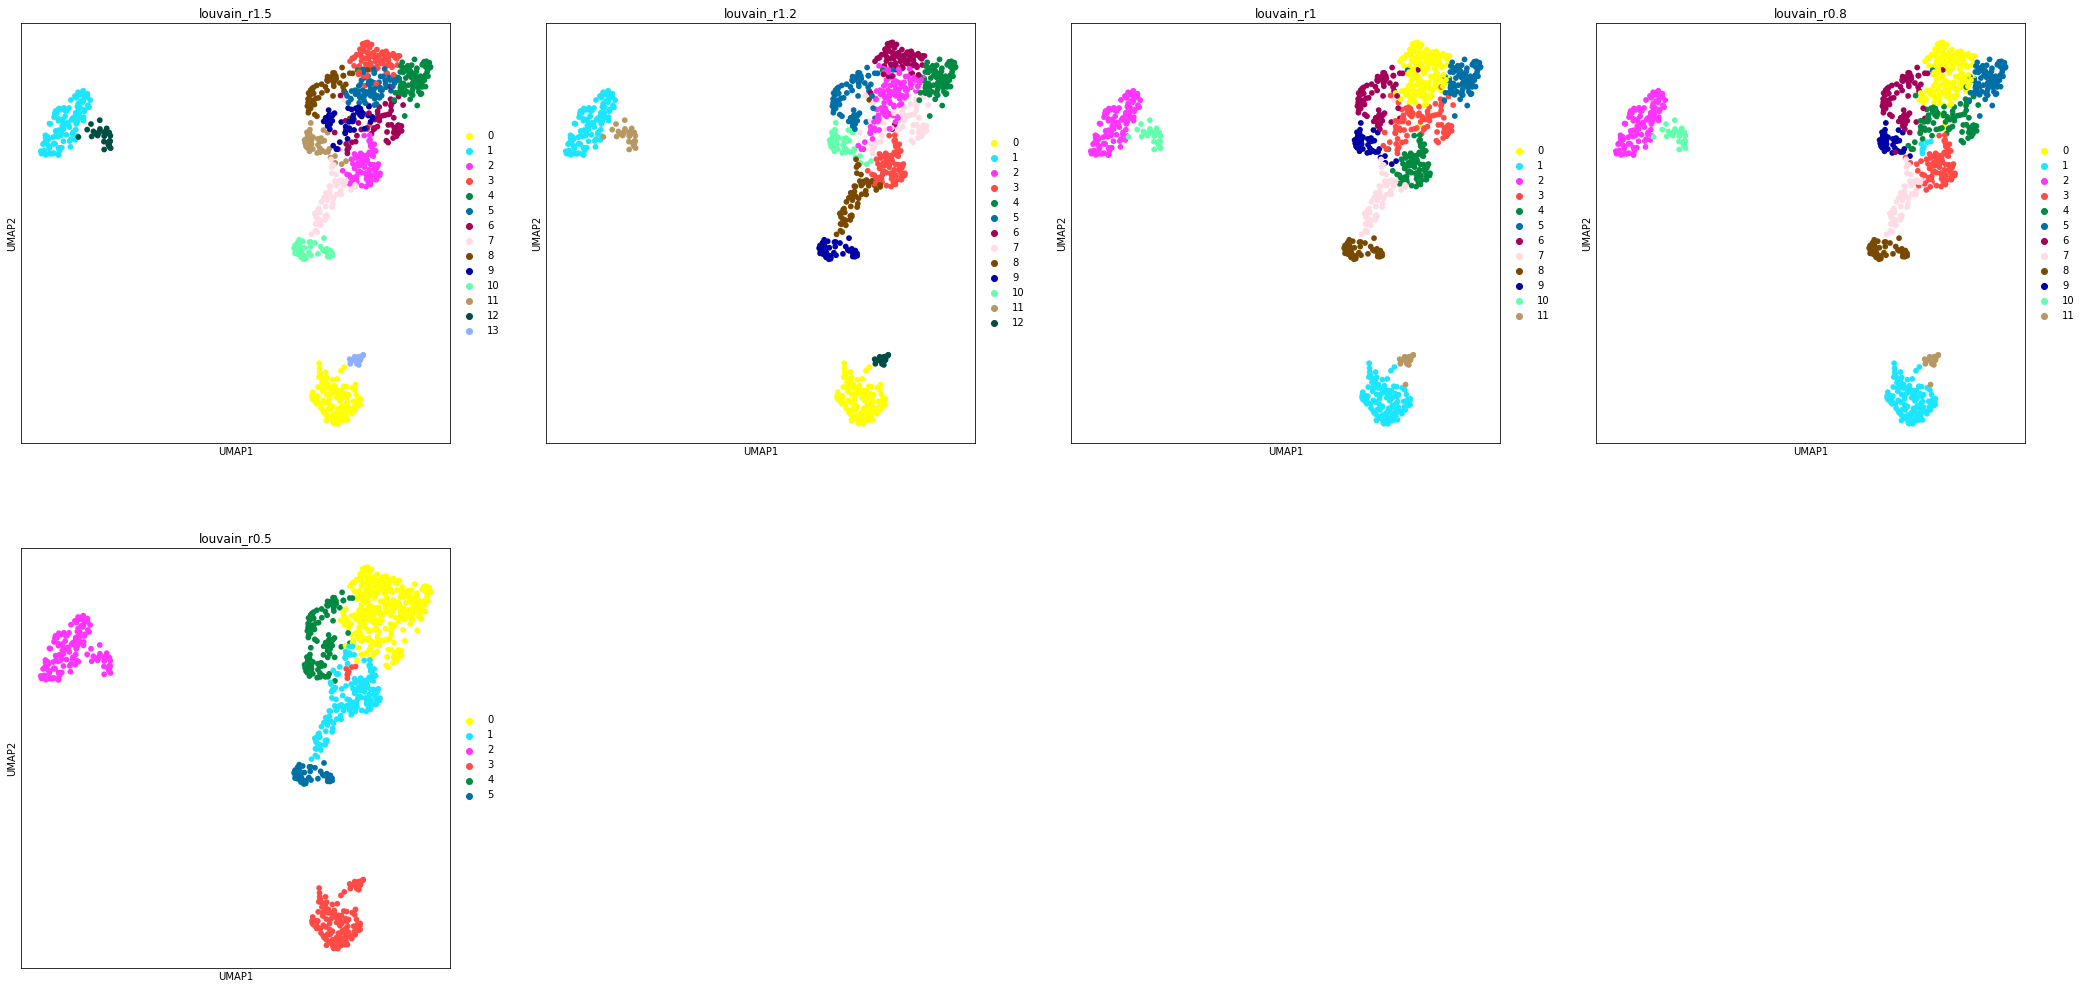

AnnData object with n_obs × n_vars = 904 × 23299 
    obs: 'batch', 'time_point', 'cell_num', 'batch_E12', 'batch_E16', 'batch_P00', 'batch_P60', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'Cd14', 'Cdh1', 'Meis2', 'S_score', 'G2M_score', 'phase', 'cc_dif', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.8', 'louvain_r1.2', 'louvain_r1.5', '__is_in_cluster__'
    var: 'accession', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_E12_colors', 'batch_E16_colors', 'batch_P00_colors', 'batch_P60_colors', 'louvain', 'louvain_r0.5_colors', 'louvain_r0.8_colors', 'louvain_r1.2_colors', 'louvain_r1.5_colors', 'louvain_r1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes', 'rank_genes_groups_filtered', 'time_point_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'spliced', 'unspliced'

In [9]:
#set plotting parameters
plt.rcParams['figure.figsize']=(8,8)
draw_umap_npcs(adata_cc,15)